## Libraries

In [196]:
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import namedtuple
from datetime import datetime, timedelta

## Data ingestion

In [161]:
df = pd.read_csv('dados/bq-results-20220905-234833-1662430745875.csv', parse_dates=['DS_BR'])
df = df.sort_values(by='DS_BR', ascending=True)

## Datetime to Date

In [162]:
df['dt_date'] = df['DS_BR'].dt.date

## Maior quantidade de overlaps entre horários de solicitação de viagem em uma janela de 30 minutos

In [163]:
window_in_minutes = 30

df['dt_end'] = df['DS_BR'] + timedelta(minutes=window_in_minutes)

In [164]:
%%time

Range = namedtuple('Range', ['start', 'end'])

lst_overlaps = []
for _, row1 in tqdm(df.iterrows()):
    r1 = Range(start=row1['DS_BR'], end=row1['dt_end'])
    qtd_overlap = 0
    
    for _, row2 in df[r1.start.date() == df['dt_date']].iloc[:].iterrows():
        r2 = Range(start=row2['DS_BR'], end=row2['dt_end'])
        
        #if r1.start.date() == r2.start.date(): 
        latest_start = max(r1.start, r2.start)
        earliest_end = min(r1.end, r2.end)
        delta = (earliest_end - latest_start).days + 1
        overlap = max(0, delta)
        
        if overlap > 0:
            qtd_overlap += 1
        else: break
        
        
        #print(r1.start, r2.start, 1 if overlap > 0 else 0)
        
    lst_overlaps.append(qtd_overlap)

444626it [2:48:17, 44.03it/s]

CPU times: total: 2h 48min 17s
Wall time: 2h 48min 17s


In [165]:
df = pd.concat([df, pd.DataFrame(lst_overlaps, columns=['qtd_overlaps'])], axis=1)#.head()
df = df.sort_values(by='qtd_overlaps', ascending=False)

In [170]:
df.to_csv('results/overlaps.csv')

In [166]:
print(f'A maior quantidade de overlaps é de {df["qtd_overlaps"].max()} solicitações de viagem.')

A maior quantidade de overlaps é de 257 solicitações de viagem.


In [187]:
## 

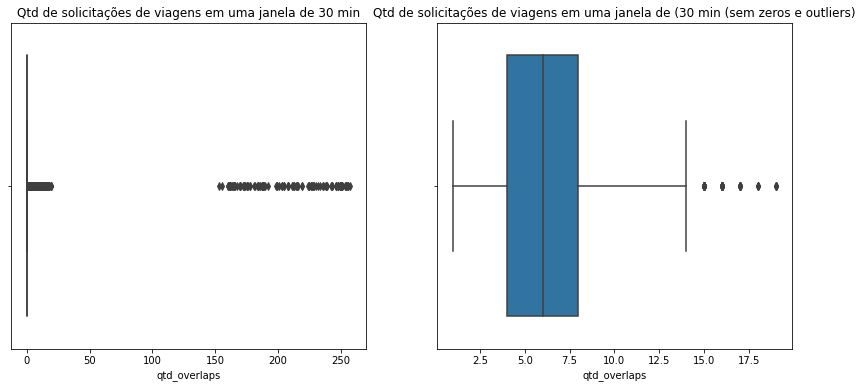

In [200]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6), sharey=True)

sns.boxplot(data=df, x='qtd_overlaps', ax=ax1);
sns.boxplot(data=df[(df["qtd_overlaps"]>0)&(df["qtd_overlaps"]<150)], x='qtd_overlaps', ax=ax2);

title1 = f'Qtd de solicitações de viagens em uma janela de {window_in_minutes} min'
title2 = f'Qtd de solicitações de viagens em uma janela de {window_in_minutes} min (sem zeros e outliers)'

ax1.set_title(title1)
ax2.set_title(title2);

plt.show();

In [206]:
print(f'Quando há solicitações de viagens em uma janela de {window_in_minutes} minutos a quantidade média é de {df[df["qtd_overlaps"]>0]["qtd_overlaps"].median()} solicitações.')

Quando há solicitações de viagens em uma janela de 30 minutos a quantidade média é de 6.0 solicitações.
